In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('threads.csv')

print(df.head())

        source                                 review_description  rating  \
0  Google Play  Meh. Not the greatest experience on a Chromebo...       2   
1  Google Play  Pretty good for a first launch!! Its easy to u...       3   
2  Google Play  For a brand new app, it's very well optimized....       3   
3  Google Play  Great app with a lot of potential! However, th...       3   
4  Google Play  The app is good, but it needs a lot of functio...       3   

           review_date  
0  2023-07-08 14:18:24  
1  2023-07-19 20:52:48  
2  2023-07-06 23:03:11  
3  2023-07-10 00:53:25  
4  2023-07-06 16:57:43  


In [8]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32910 entries, 0 to 32909
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   source              32910 non-null  object
 1   review_description  32910 non-null  object
 2   rating              32910 non-null  int64 
 3   review_date         32910 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.0+ MB
None
             rating
count  32910.000000
mean       3.398481
std        1.751480
min        1.000000
25%        1.000000
50%        4.000000
75%        5.000000
max        5.000000
source                0
review_description    0
rating                0
review_date           0
dtype: int64


In [9]:
df['review_date'] = pd.to_datetime(df['review_date'])
print(df.head())

        source                                 review_description  rating  \
0  Google Play  Meh. Not the greatest experience on a Chromebo...       2   
1  Google Play  Pretty good for a first launch!! Its easy to u...       3   
2  Google Play  For a brand new app, it's very well optimized....       3   
3  Google Play  Great app with a lot of potential! However, th...       3   
4  Google Play  The app is good, but it needs a lot of functio...       3   

          review_date  
0 2023-07-08 14:18:24  
1 2023-07-19 20:52:48  
2 2023-07-06 23:03:11  
3 2023-07-10 00:53:25  
4 2023-07-06 16:57:43  


In [10]:
!pip install textblob

In [13]:
from textblob import TextBlob

# Define a function for sentiment analysis using TextBlob
def analyze_sentiment(text):
    analysis = TextBlob(str(text))
    return analysis.sentiment.polarity

# Apply sentiment analysis to the 'review_description' column
df['sentiment'] = df['review_description'].apply(analyze_sentiment)

# Display the updated DataFrame with sentiment scores
print(df[['review_description', 'sentiment']])

                                      review_description  sentiment
0      Meh. Not the greatest experience on a Chromebo...   0.092187
1      Pretty good for a first launch!! Its easy to u...   0.282205
2      For a brand new app, it's very well optimized....   0.153438
3      Great app with a lot of potential! However, th...   0.128571
4      The app is good, but it needs a lot of functio...   0.313333
...                                                  ...        ...
32905  This killed my dog. Mark zuckerburg strangled ...  -0.200000
32906              Add Search and hashtag like Twitter !   0.000000
32907                                        bad twister  -0.700000
32908                       Yet another trash from Meta.   0.000000
32909  Nothing special this app is just a copy of twi...   0.357143

[32910 rows x 2 columns]


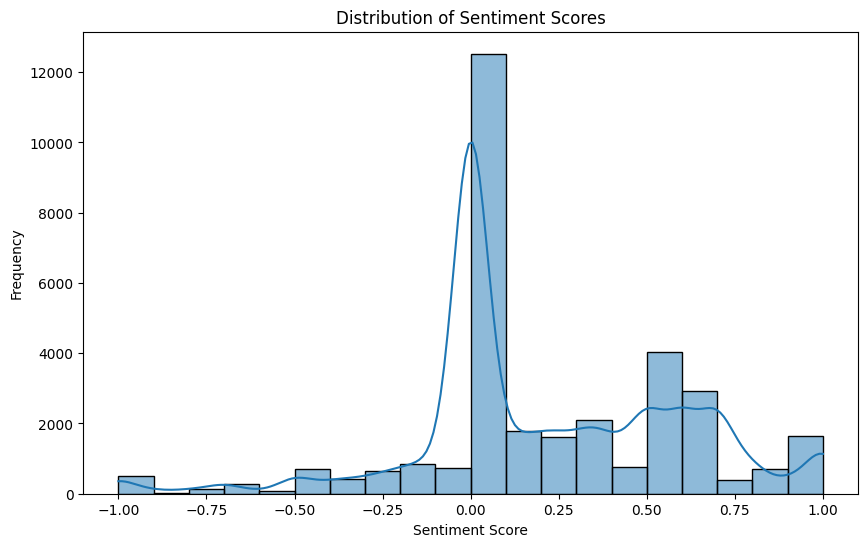

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=20, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

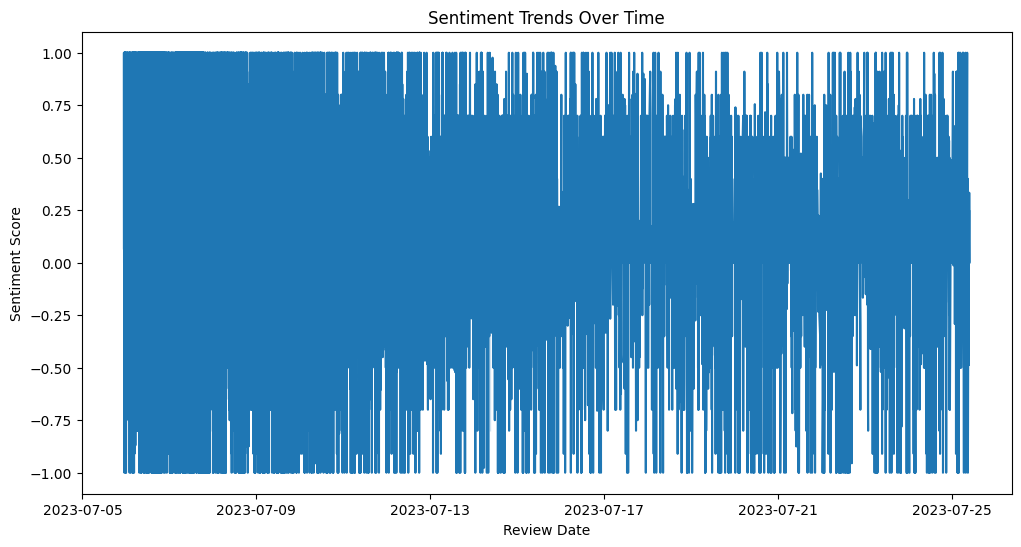

In [17]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='review_date', y='sentiment', data=df)
plt.title('Sentiment Trends Over Time')
plt.xlabel('Review Date')
plt.ylabel('Sentiment Score')
plt.show()